In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


In [2]:
data = pd.read_csv('/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')

In [3]:
data.head(20)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
print('Checking for Null Values')
data.isna().sum()

Checking for Null Values


Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In the data we see that there are multiple entries for a book with different editions. Let's keep only the latest ones.

In [6]:
data.drop_duplicates(subset=['Name'], keep='last', inplace=True)

Things we want to check on this dataset right off the bat:
1. What Genre of books are available? What is the percent of each genre that's being sold?
2. Top 10 Authors with respect to user ratings
3. Most Expensive books available.
4. Top 10 books with respect to user ratings

In [7]:
print('Genre of Books')
print(data['Genre'].unique())
print(data.groupby('Genre').count()['Name'])

Genre of Books
['Non Fiction' 'Fiction']
Genre
Fiction        160
Non Fiction    191
Name: Name, dtype: int64


In [8]:
print('Percentage of Genre')
genre_group = data.groupby('Genre').count()['Name'].reset_index()
genre_group['%age'] = [(i/genre_group["Name"].sum())*100 for i in genre_group['Name']]

Percentage of Genre


In [9]:
genre_group

,Genre,Name,%age
0,Fiction,160,45.584046
1,Non Fiction,191,54.415954


In [10]:
print('Look for Top 10 Authors')
data.sort_values(by='User Rating', ascending=False)

Look for Top 10 Authors


,Name,Author,User Rating,Reviews,Price,Year,Genre
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction
174,Humans of New York : Stories,Brandon Stanton,4.9,2812,17,2015,Non Fiction
147,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2013,Fiction
289,Rush Revere and the First Patriots: Time-Trave...,Rush Limbaugh,4.9,3836,12,2014,Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
...,...,...,...,...,...,...,...
393,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,2014,Fiction
22,Allegiant,Veronica Roth,3.9,6310,13,2013,Fiction
107,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2013,Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction


In [11]:
author_rank = data.groupby('Author').mean()['User Rating'].sort_values(ascending=False)

In [12]:
print(f'Top 10 OGs {author_rank[0:10]}')

Top 10 OGs Author
Patrick Thorpe          4.9
Alice Schertle          4.9
Dav Pilkey              4.9
Pete Souza              4.9
Lin-Manuel Miranda      4.9
Rush Limbaugh           4.9
Sarah Young             4.9
Jill Twiss              4.9
Nathan W. Pyle          4.9
Sherri Duskey Rinker    4.9
Name: User Rating, dtype: float64


In [13]:
print('Number of books published per Author')
book_author_count = data['Author'].value_counts()
print(book_author_count)

Number of books published per Author
Jeff Kinney            12
Rick Riordan           10
Stephenie Meyer         7
Bill O'Reilly           6
Dav Pilkey              6
                       ..
Eric Larson             1
Christopher Paolini     1
Jennifer Smith          1
Sarah Young             1
Jen Sincero             1
Name: Author, Length: 248, dtype: int64


In [14]:
print('Top 10 Expensive books')
print(data.sort_values(by='Price', ascending=False)[['Name','Price']][0:10])

Top 10 Expensive books
                                                  Name  Price
70   Diagnostic and Statistical Manual of Mental Di...    105
473                       The Twilight Saga Collection     82
151                           Hamilton: The Revolution     54
346  The Book of Basketball: The NBA According to T...     53
159         Harry Potter Paperback Box Set (Books 1-7)     52
280  Publication Manual of the American Psychologic...     46
524                                           Watchmen     42
443                       The Official SAT Study Guide     40
338                                      The Alchemist     39
444  The Official SAT Study Guide, 2016 Edition (Of...     36


In [15]:
print(f'Top 10 Books as per rating {data.groupby("Name").mean()["User Rating"].sort_values(ascending=False)[1:10]}')

Top 10 Books as per rating Name
Humans of New York : Stories                                                                       4.9
Goodnight, Goodnight Construction Site (Hardcover Books for Toddlers, Preschool Books for Kids)    4.9
Rush Revere and the First Patriots: Time-Travel Adventures With Exceptional Americans (2)          4.9
Brown Bear, Brown Bear, What Do You See?                                                           4.9
Hamilton: The Revolution                                                                           4.9
Dog Man: Brawl of the Wild: From the Creator of Captain Underpants (Dog Man #6)                    4.9
Rush Revere and the Brave Pilgrims: Time-Travel Adventures with Exceptional Americans (1)          4.9
Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)            4.9
Harry Potter and the Goblet of Fire: The Illustrated Edition (Harry Potter, Book 4) (4)            4.9
Name: User Rating, dtype: float64


Let's create some graphs

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

Top 10 Selling books


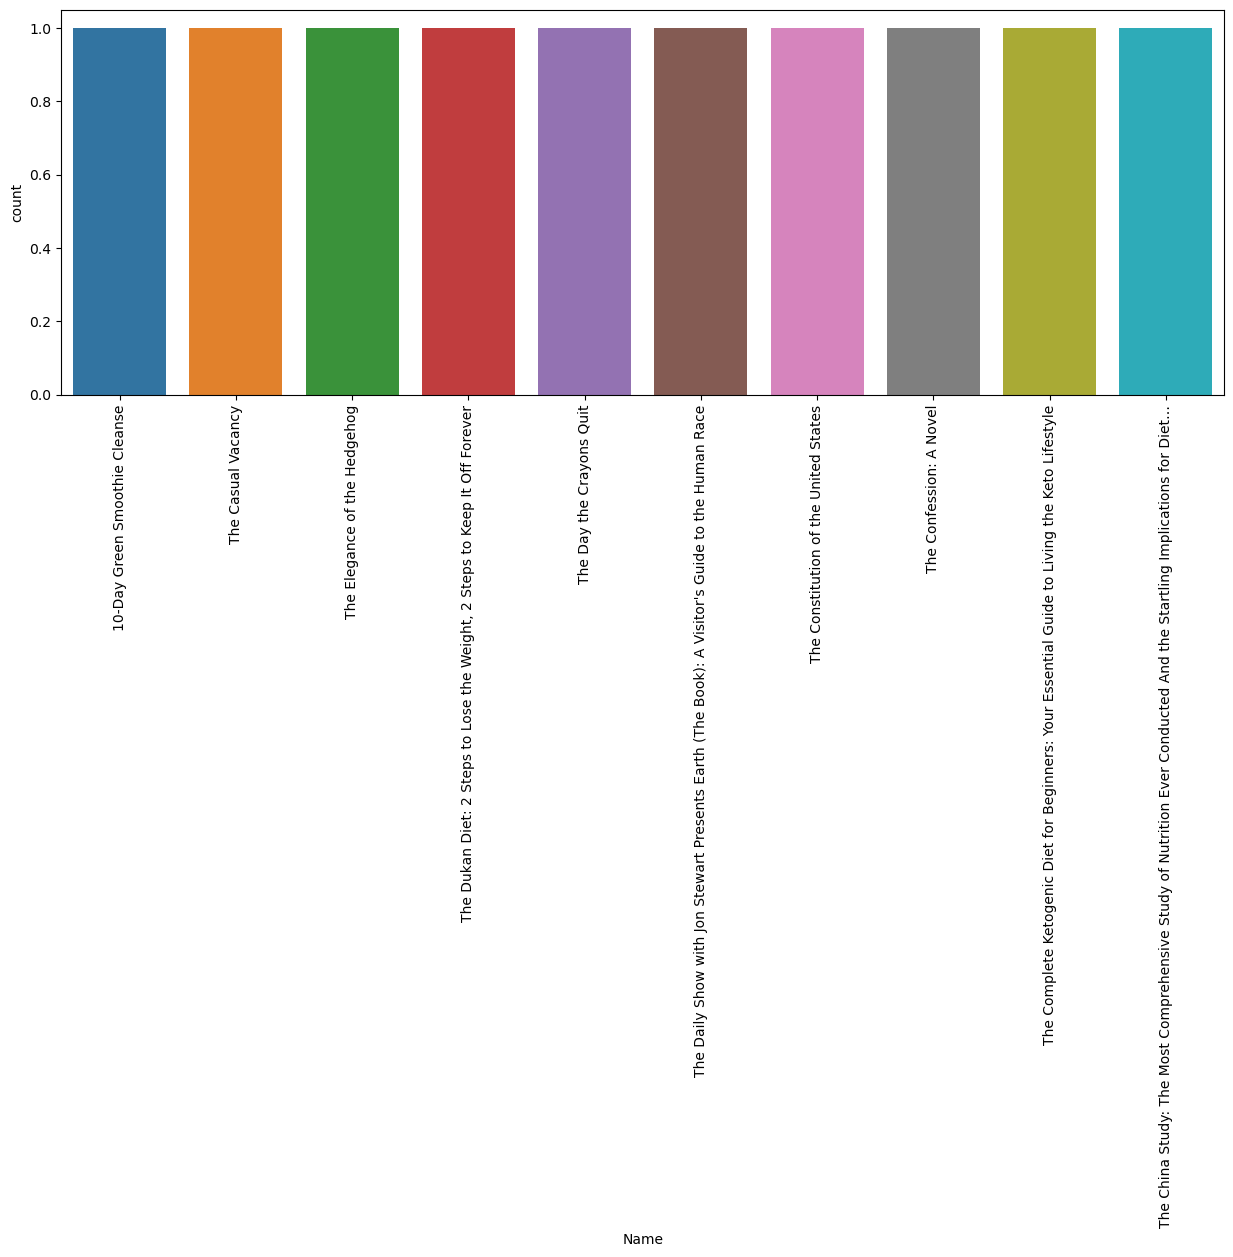

In [17]:
# Loaded the data again.
print('Top 10 Selling books')
top_bestselling_book = data.groupby('Name')['Name'].agg(['count']).reset_index().sort_values(by='count',ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(data=top_bestselling_book,x="Name",y="count")
plt.xticks(rotation=90)
plt.show()

[]

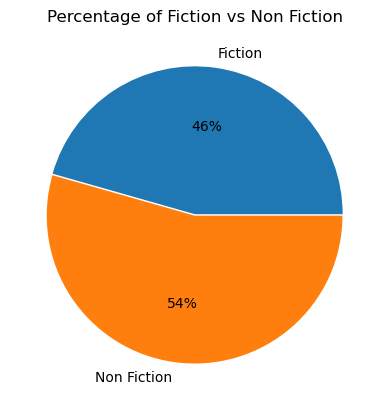

In [18]:
explode = [0, 0.01]
plt.pie(genre_group['%age'], labels=genre_group['Genre'], explode=explode, autopct='%.0f%%')
plt.title('Percentage of Fiction vs Non Fiction')
plt.plot()

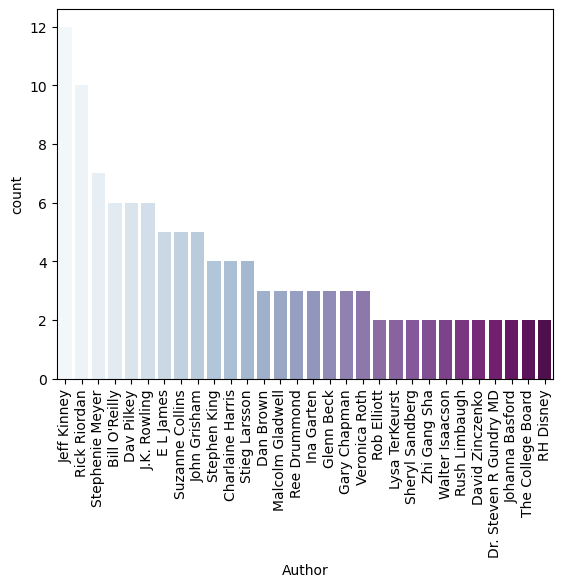

In [19]:
sns.countplot(data=data, x=data['Author'], palette='BuPu', order=data['Author'].value_counts().index[0:30])
plt.xticks(rotation=90)
plt.show()